# Week 3 Homework: IMDB

## Part #1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/Users/Joel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### read in 'imdb_1000.csv' and store it in a DataFrame named movies

In [2]:
filepath = '../../DAT-DC-10/data/imdb_1000.csv'
movies = pd.read_csv(filepath, encoding='utf-8')

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
type(movies)

pandas.core.frame.DataFrame

### check the number of rows and columns

In [5]:
len(movies.columns)

6

In [6]:
len(movies.index)

979

In [7]:
movies.size

5874

In [8]:
movies.shape

(979, 6)

### check the data type of each column

In [9]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [10]:
[type(col) for col in movies.loc[0]]

[numpy.float64, unicode, unicode, unicode, numpy.int64, unicode]

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 53.5+ KB


### calculate the average movie duration

In [12]:
m = movies
m = m['duration']
m.mean()

120.97957099080695

### sort the DataFrame by duration to find the shortest and longest movies

In [13]:
m = movies
m = m['duration']
m.min(), m.max()

(64, 242)

In [14]:
movies.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [15]:
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### create a histogram of duration

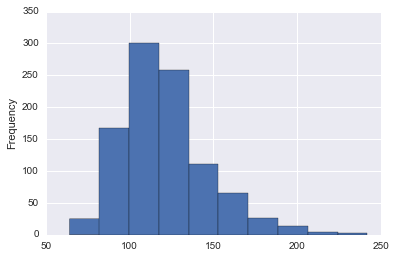

In [17]:
m = movies
m = m['duration']
myplt = m.plot(kind='hist')

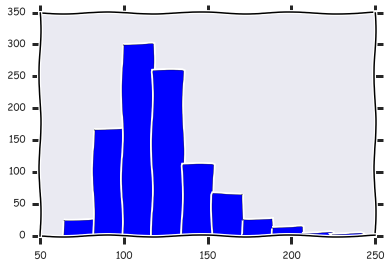

In [32]:
plt.hist(movies['duration'])
#plt.axis([0, 6, 0, 20])
#plt.show()
plt.xkcd()

### use a box plot to display that same data

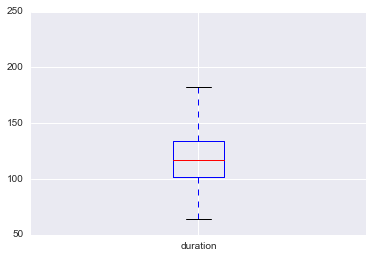

In [32]:
m = movies
m = m['duration']
m.plot(kind='box')

## Part #2

### count how many movies have each of the content ratings

In [33]:
m = movies
m['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

### use a visualization to display that same data, including a title and x and y labels

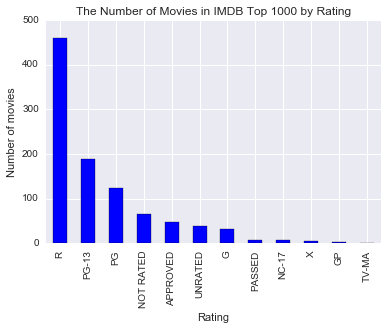

In [36]:
m = movies
m['content_rating'].value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Number of movies")
plt.title("The Number of Movies in IMDB Top 1000 by Rating")

### convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

In [37]:
m = movies
m.replace(["NOT RATED", "APPROVED", "PASSED", "GP"], "UNRATED", inplace=True)
m

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


### convert the following content ratings to "NC-17": X, TV-MA

In [38]:
m = movies
m.replace(["X", "TV-MA"], "NC-17", inplace=True)
m

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


### count the number of missing values in each column

In [39]:
m = movies
m.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

### if there are missing values: examine them, then fill them in with "reasonable" values

In [40]:
m = movies
m.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [41]:
m[m.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [42]:
m.fillna("UNRATED", inplace=True)

In [43]:
m[m.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list


In [44]:
m.loc[[187, 649, 936]]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,UNRATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,UNRATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


### calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours

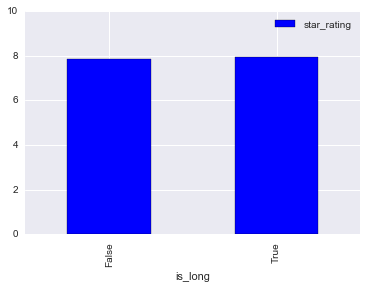

In [24]:
m = movies.copy()
m['is_long'] = (m['duration'] >= 2*60)
m = m[['star_rating', 'is_long']]
m.groupby('is_long').mean().plot(kind='bar', ylim=[0,10])

In [25]:
m = movies.copy()
m['is_long'] = (m['duration'] >= 2*60)
m = m[['star_rating', 'is_long']]
g = m.groupby('is_long').mean()
g['star_rating'][1] - g['star_rating'][0]

0.11023201174742514

The average star rating for a long movie is 0.11 higher than that of a short movie.

In [45]:
m = movies.copy()
m[m['duration'] >= 120]['star_rating'].mean()

7.948898678414082

In [47]:
m[m['duration'] < 120]['star_rating'].mean()

7.838666666666657

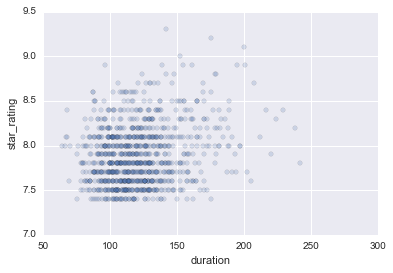

In [49]:
m.plot(kind='scatter', x='duration', y='star_rating', alpha = 0.2)

### use a visualization to detect whether there is a relationship between duration and star rating

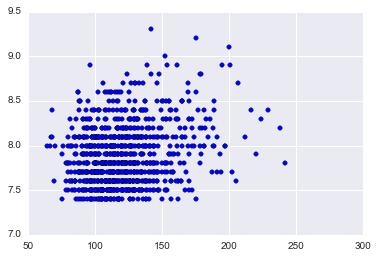

In [51]:
m = movies.copy()
m = m[['duration', 'star_rating']]
plt.scatter(m['duration'], m['star_rating'])

In [52]:
m = movies.copy()
m = m[['duration', 'star_rating']]
plt.pyplot.scatter(m['duration'], m['star_rating'])

AttributeError: 'module' object has no attribute 'pyplot'

/Users/Joel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


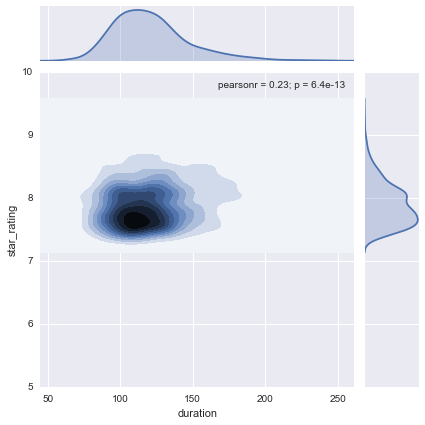

In [53]:
sns.jointplot("duration","star_rating", data=m, ylim=[5,10], kind="kde")

### calculate the average duration for each genre

In [29]:
m = movies
m = m[['genre', 'duration']]
m.groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


In [57]:
m = movies.copy()
m.groupby('genre').agg({'duration':np.mean})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Part #3

### visualize the relationship between content rating and duration

In [58]:
%matplotlib inline

OrderedDict([(u'G', <matplotlib.axes._subplots.AxesSubplot at 0x10e4e4b90>),
             ('NC-17', <matplotlib.axes._subplots.AxesSubplot at 0x10e5a8ad0>),
             (u'PG', <matplotlib.axes._subplots.AxesSubplot at 0x10e637110>),
             (u'PG-13',
              <matplotlib.axes._subplots.AxesSubplot at 0x10e69a310>),
             (u'R', <matplotlib.axes._subplots.AxesSubplot at 0x10e84b290>),
             ('UNRATED',
              <matplotlib.axes._subplots.AxesSubplot at 0x10e898f10>)])

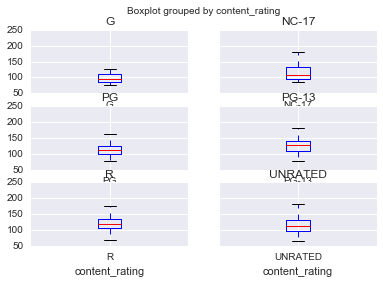

In [62]:
m = movies.copy()
g = m[['content_rating', 'duration']].groupby('content_rating')
g.boxplot(column='duration', by='content_rating')

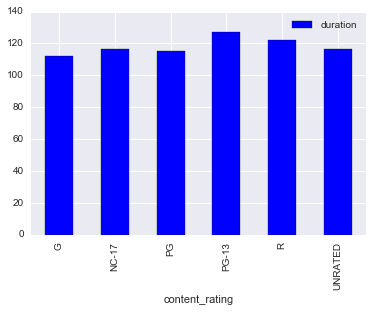

In [60]:
g.mean().plot(kind='bar')

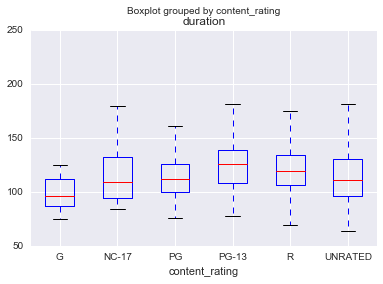

In [61]:
movies.boxplot(column='duration', by='content_rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f24ca10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fa1f790>]], dtype=object)

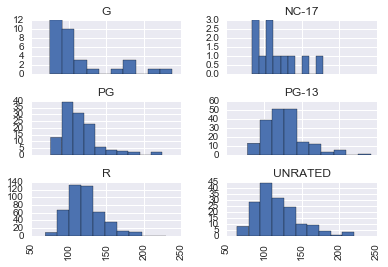

In [64]:
movies.hist(column='duration', by='content_rating', sharex=True)

### determine the top rated movie (by star rating) for each genre

In [84]:
m = movies.copy()
m = m[['genre', 'title', 'star_rating']]
#m = m[m[['genre','star_rating']] == m.groupby('genre').max()['star_rating']]
m[['genre', 'star_rating']]
m.groupby('genre').max().reset_index('genre')[['genre', 'star_rating']]

#g.count

,genre,star_rating
0,Action,9.0
1,Adventure,8.9
2,Animation,8.6
3,Biography,8.9
4,Comedy,8.6
5,Crime,9.3
6,Drama,8.9
7,Family,7.9
8,Fantasy,7.7
9,Film-Noir,8.3


In [97]:
m = movies.copy()
g = movies[['star_rating','genre']].groupby('genre').max()
g = g.reset_index('genre')
m.merge(g, how='inner', on=['genre', 'star_rating']).sort_values(['genre', 'star_rating'])

,star_rating,title,content_rating,genre,duration,actors_list
1,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
6,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
7,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
8,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
9,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
2,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
3,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [76]:
m = movies.copy()
g = m.sort_values('star_rating', ascending=False).groupby('genre')
g[['title','content_rating', 'star_rating', 'genre']].first()

,title,content_rating,star_rating,genre
genre,,,,
Action,The Dark Knight,PG-13,9.0,Action
Adventure,The Lord of the Rings: The Return of the King,PG-13,8.9,Adventure
Animation,Spirited Away,PG,8.6,Animation
Biography,Schindler's List,R,8.9,Biography
Comedy,Modern Times,G,8.6,Comedy
Crime,The Shawshank Redemption,R,9.3,Crime
Drama,12 Angry Men,UNRATED,8.9,Drama
Family,E.T. the Extra-Terrestrial,PG,7.9,Family
Fantasy,The City of Lost Children,R,7.7,Fantasy


### check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

In [114]:
m = movies.copy()
merged = m.merge(movies,how='inner',on='title')
merged_true = merged[merged['duration_x'] < merged['duration_y']]
merged_true

,star_rating_x,title,content_rating_x,genre_x,duration_x,actors_list_x,star_rating_y,content_rating_y,genre_y,duration_y,actors_list_y
468,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",7.9,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
665,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",7.4,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
685,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",7.7,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
712,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",7.5,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


None seem to actually be duplicates

In [79]:
m = movies.copy()
dt = m[m['title'].duplicated()]['title']

In [80]:
movies[movies['title'].isin(dt)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


### calculate the average star rating for each genre, but only include genres with at least 10 movies

In [82]:
m = movies.copy()
m = m[['genre', 'title', 'star_rating']]
g = m.groupby('genre').agg(['mean', 'count'])
new_df = g['star_rating'].reset_index('genre')
df = new_df[new_df['count'] >= 10]
df.rename(columns={'genre':'genre', 'mean':'mean_star_rating', 'count':'number_of_movies'},inplace=True)
df.sort_values('mean_star_rating', ascending=False)

,genre,mean_star_rating,number_of_movies
12,Mystery,7.975000,16
1,Adventure,7.933333,75
5,Crime,7.916935,124
2,Animation,7.914516,62
6,Drama,7.902518,278
0,Action,7.884559,136
3,Biography,7.862338,77
4,Comedy,7.822436,156
11,Horror,7.806897,29
